# 라이브러리를 불러옵니다

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

# 한글폰트 사용을 위한 세팅

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 데이터 셋 로드 

In [4]:
import glob 

In [5]:
path = glob.glob('data/*.csv')
path

['data\\animal_raw.csv', 'data\\관광지.csv']

In [6]:
df = pd.read_csv(path[0], encoding = 'utf-8')
df

,크기(라벨링),나이,산책시간(시간),체중,성별
0,2,13,0.5,27.0,M
1,2,10,0.5,25.0,F
2,2,9,0.5,40.0,M
3,2,8,0.5,28.0,F
4,2,8,0.5,33.0,M
...,...,...,...,...,...
2083,2,2,1.5,25.0,F
2084,0,13,0.5,7.3,F
2085,0,5,1.5,5.0,F
2086,1,2,1.0,14.0,M


# 데이터 전처리 

In [7]:
#음수량 컬럼 새로 추가 (1kg 당 65ml)
df['음수량'] = df['체중'] * 65

## 범주형 변수 제외 

In [8]:
df_1 = df.copy()

In [9]:
df_1 = df_1.drop('성별', axis = 1)

In [10]:
df_1

,크기(라벨링),나이,산책시간(시간),체중,음수량
0,2,13,0.5,27.0,1755.0
1,2,10,0.5,25.0,1625.0
2,2,9,0.5,40.0,2600.0
3,2,8,0.5,28.0,1820.0
4,2,8,0.5,33.0,2145.0
...,...,...,...,...,...
2083,2,2,1.5,25.0,1625.0
2084,0,13,0.5,7.3,474.5
2085,0,5,1.5,5.0,325.0
2086,1,2,1.0,14.0,910.0


# 데이터 살펴보기 

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   크기(라벨링)   2088 non-null   int64  
 1   나이        2088 non-null   int64  
 2   산책시간(시간)  2088 non-null   float64
 3   체중        2088 non-null   float64
 4   음수량       2088 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 81.7 KB


In [12]:
df_1.describe()

,크기(라벨링),나이,산책시간(시간),체중,음수량
count,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000
mean,0.483238,3.964559,0.913218,9.605642,624.366715
std,0.747913,3.114288,0.265682,8.837653,574.447416
min,0.000000,0.000000,0.500000,0.040000,2.600000
25%,0.000000,2.000000,0.800000,3.600000,234.000000
50%,0.000000,3.000000,1.000000,5.600000,364.000000
75%,1.000000,5.000000,1.000000,13.000000,845.000000
max,2.000000,18.000000,1.500000,60.000000,3900.000000


In [13]:
#결측치 확인
df_1.isna().sum()

크기(라벨링)     0
나이          0
산책시간(시간)    0
체중          0
음수량         0
dtype: int64

# 군집화

In [14]:
#비교할 df_1['크기(라벨링)'] 컬럼 복사 후 제거 
size = df_1['크기(라벨링)']
del df_1['크기(라벨링)']

In [15]:
# 군집화를 진행하기에 앞서 수월한 시각화 및 설명력을 첨부하기 위하여 PCA를 통해 변수를 2개로 압축해보자.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
#정규화 진행 및 객체 생성
scaler = StandardScaler()

In [17]:
#데이터 학습 
scaler.fit(df_1)

StandardScaler()

In [18]:
scaler_data = scaler.transform(df_1)

In [19]:
#객체생성 (2개의 객체 만들것임)
pca = PCA(n_components = 2)

In [20]:
pca.fit(scaler_data)

PCA(n_components=2)

In [21]:
pca.transform(scaler_data)

array([[ 0.86440283,  4.14427655],
       [ 0.82825952,  3.19253236],
       [ 2.91337599,  3.95405675],
       ...,
       [ 0.39208597, -0.73885707],
       [ 0.90087413, -0.33440585],
       [ 1.63711264,  0.04431214]])

In [22]:
#2개의 피쳐로 학습된 데이터를 데이터프레임 형태로 변환해주자 
data = pd.DataFrame(data = pca.transform(scaler_data), columns = ['pc1', 'pc2'])
data.head()

,pc1,pc2
0,0.864403,4.144277
1,0.828260,3.192532
2,2.913376,3.954057
3,1.384231,2.856420
4,2.053538,3.200709


# 그렇다면 몇 개로 군집화를 하는게 가장 적당한가?
- 위의 데이터를 몇 개의 군집화로 나누는 것이 가장 올바른 군집화인지 살펴보자 

`KMeans(n_cluster = k)`

- k개의 군집화를 하겠다는 객체 생성

`Kmeans.fit()`

- 학습시키기

`KMeans.inertia_`

- 학습된 KMeans의 응집도를 확인
- 응집도란 각 데이터로부터 자신이 속한 군집의 중심까지의 거리를 의미
- 즉, 낮을수록 군집화가 더 잘되어있음.

`KMeans.predict(data)`

- 학습된 데이터를 바탕으로 데이터를 변환시켜줌

In [23]:
# 군집화 라이브러리 불러오기 
from sklearn.cluster import KMeans

In [24]:
x = [] #k가 몇개인지 -
y = [] #응집도가 몇인지 

# 범위가 1~30인 이유
for k in range (1,30): 
    kmeans = KMeans(n_clusters = k) # 1~ 29개의 군집화 된 객체를 kmeans라고 함   
    kmeans.fit(data)               # kmeans에다가 data2를 학습시킬것임 
    
    x.append(k)
    y.append(kmeans.inertia_)

    
#k가 n개 일 때 응집도는 a라고 이해하면 된다 

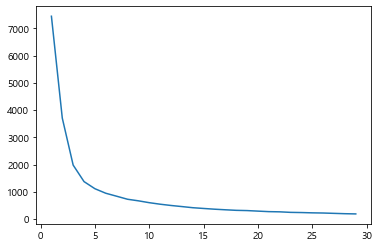

In [25]:
#그래프 그리기
plt.plot(x,y)

In [26]:
# 4개로 군집화 된 객체를 생성 
kmeans = KMeans(n_clusters = 3)

In [27]:
# 군집화 할 데이터 'data2'를 학습시키기 
kmeans.fit(data)

KMeans(n_clusters=3)

In [28]:
# 학습된 kmeans의 응집도 확인 (각 데이터로부터 자신이 속한 군집의 중심까지의 거리)
# 응집도가 낮을수록 군집화가 더 잘되어있는 것이다

In [29]:
# 학습된 데이터를  labels 라는 컬럼에 넣어주자 
data['labels'] = kmeans.predict(data)

In [30]:
data.head()

,pc1,pc2,labels
0,0.864403,4.144277,0
1,0.828260,3.192532,0
2,2.913376,3.954057,2
3,1.384231,2.856420,2
4,2.053538,3.200709,2


In [31]:
# 위의 값들을 시각화 할거고 그래서 pca를 만든것 

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

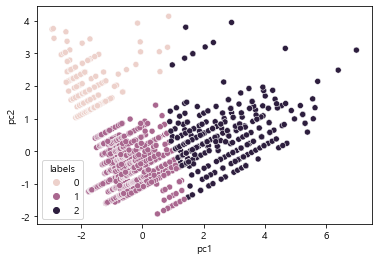

In [32]:
sns.scatterplot(x = 'pc1', y = 'pc2', hue = 'labels', data = data)

# 클러스터링 결과 해석하기

pca와 클러스터링을 통해 결과를 해석해봅시다

어떤 그룹이 대형견 군집인지  평균치로 확인해보자 

In [33]:
data['크기'] = size

In [34]:
data.head()

,pc1,pc2,labels,크기
0,0.864403,4.144277,0,2
1,0.828260,3.192532,0,2
2,2.913376,3.954057,2,2
3,1.384231,2.856420,2,2
4,2.053538,3.200709,2,2


In [35]:
# 시각화를 위해 각 그룹별 크기값을 따로 변수로 생성
# labels값 별 크기의 평균을 구해놓은 변수임

size_0 = data[data['labels']==0]['크기'].mean()
size_1 = data[data['labels']==1]['크기'].mean()
size_2 = data[data['labels']==2]['크기'].mean()

<AxesSubplot:>

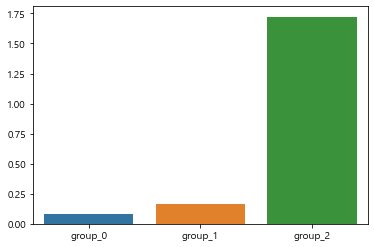

In [36]:
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 '랜덤'임을 잊지 말 것
sns.barplot(x = ['group_0','group_1','group_2'], y = [size_0, size_1, size_2])

In [37]:
df

,크기(라벨링),나이,산책시간(시간),체중,성별,음수량
0,2,13,0.5,27.0,M,1755.0
1,2,10,0.5,25.0,F,1625.0
2,2,9,0.5,40.0,M,2600.0
3,2,8,0.5,28.0,F,1820.0
4,2,8,0.5,33.0,M,2145.0
...,...,...,...,...,...,...
2083,2,2,1.5,25.0,F,1625.0
2084,0,13,0.5,7.3,F,474.5
2085,0,5,1.5,5.0,F,325.0
2086,1,2,1.0,14.0,M,910.0


In [38]:
df_1

,나이,산책시간(시간),체중,음수량
0,13,0.5,27.0,1755.0
1,10,0.5,25.0,1625.0
2,9,0.5,40.0,2600.0
3,8,0.5,28.0,1820.0
4,8,0.5,33.0,2145.0
...,...,...,...,...
2083,2,1.5,25.0,1625.0
2084,13,0.5,7.3,474.5
2085,5,1.5,5.0,325.0
2086,2,1.0,14.0,910.0


In [39]:
# 원본 데이터에 라벨을 복제합니다.
df_1['labels'] = data['labels']
df_1

,나이,산책시간(시간),체중,음수량,labels
0,13,0.5,27.0,1755.0,0
1,10,0.5,25.0,1625.0,0
2,9,0.5,40.0,2600.0,2
3,8,0.5,28.0,1820.0,2
4,8,0.5,33.0,2145.0,2
...,...,...,...,...,...
2083,2,1.5,25.0,1625.0,2
2084,13,0.5,7.3,474.5,0
2085,5,1.5,5.0,325.0,1
2086,2,1.0,14.0,910.0,1


In [40]:
#값들을 labels로 묶은 각 컬럼 별 평균치 구해주기
# 지저분한 index들 reset해주깅
df_1 = df_1.groupby('labels').mean().reset_index()

In [41]:
df_1

,labels,나이,산책시간(시간),체중,음수량
0,0,10.085106,0.500000,5.128121,333.327837
1,1,3.000732,0.911347,5.801955,377.127050
2,2,3.034091,1.183864,24.284045,1578.462955


In [42]:
column = df_1.columns
column

Index(['labels', '나이', '산책시간(시간)', '체중', '음수량'], dtype='object')

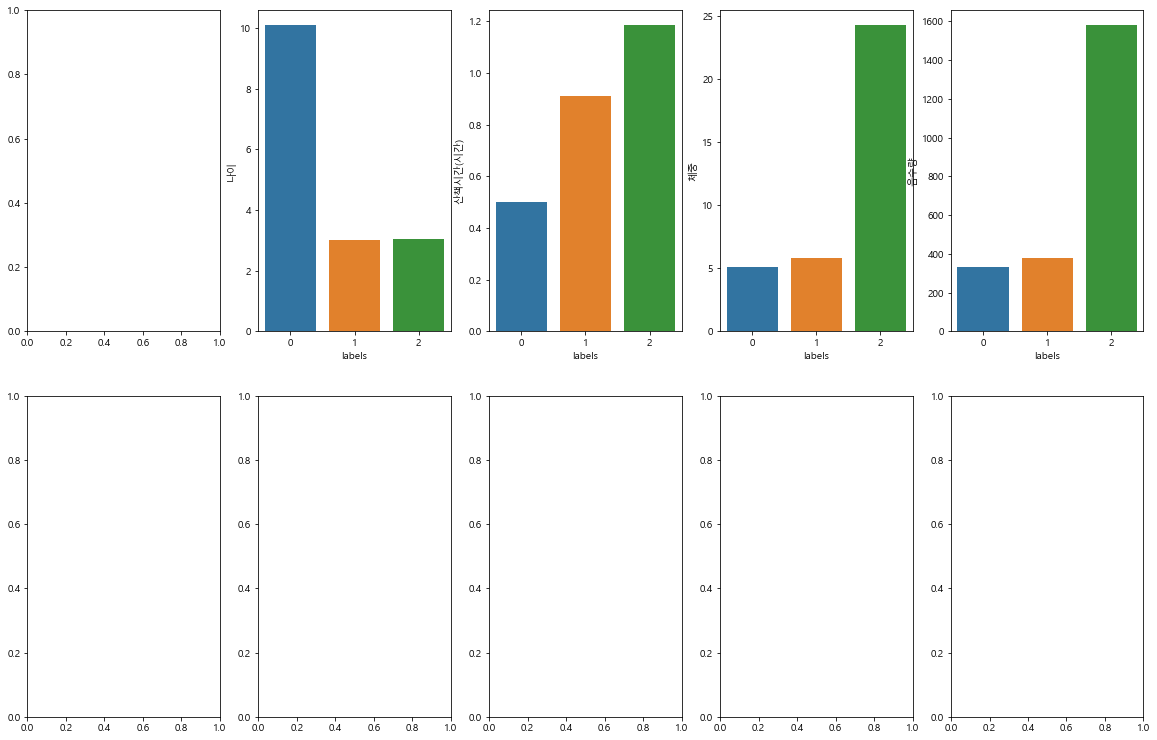

In [43]:
f, ax = plt.subplots(2,5,figsize = (20,13))

            # 12개의 컬럼
for i in range(1, 5) :                                    
    sns.barplot(x = 'labels', y = column[i], data = df_1, ax = ax[i//5 , i%5])

In [44]:
# labels 군집 기준은 아무래도 나이 인것 같음 /  애당초 예상했던 소/중/대형견 크기로 반려동물 추천서비스? 를 해주면 안될 것 같음 ㅠ 
# 그 근거로 산책시간 섭플랏 , 체중 섭플랏, 보면 우하향 곡선을 끠고 있음... 

In [45]:
df_1[df_1['labels']==0].describe()
df_1[df_1['labels']==1].describe()
df_1[df_1['labels']==2].describe()

,pc1,pc2,labels,크기
count,440.000000,440.000000,440.0,440.000000
mean,2.538771,0.434144,2.0,1.722727
std,1.112882,0.760963,0.0,0.448162
min,0.899983,-1.411082,2.0,1.000000
25%,1.549657,-0.055908,2.0,1.000000
50%,2.400009,0.350084,2.0,2.000000
75%,3.248133,0.824934,2.0,2.000000
max,6.981312,3.954057,2.0,2.000000


In [ ]:
# 모집단크기가 2000개라 나이? 로 구분이 잘 안된거 같음 / 7000개로 만들어서 다시 시도해보기 